In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [303]:
# load the data...
df=pd.read_csv('suicide-rate-by-country-2024.csv')
df.head()

,country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


In [304]:
# renaming the lengthy column names to short column names...
df.rename(columns={'SuicideRate_BothSexes_RatePer100k_2021':'SRB_2021','SuicideRate_Male_RatePer100k_2021':'SRM_2021', 'SuicideRate_Female_RatePer100k_2021':'SRF_2021', 'SuicideRate_BothSexes_RatePer100k_2020':'SRB_2020', 'SuicideRate_Male_RatePer100k_2020':'SRM_2020','SuicideRate_Female_RatePer100k_2020':'SRF_2020', 'SuicideRate_BothSexes_RatePer100k_2019':'SRB_2019', 'SuicideRate_Male_RatePer100k_2019':'SRM_2019', 'SuicideRate_Female_RatePer100k_2019':'SRF_2019'}, inplace =True)
df

,country,SRB_2021,SRM_2021,SRF_2021,SRB_2020,SRM_2020,SRF_2020,SRB_2019,SRM_2019,SRF_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3
...,...,...,...,...,...,...,...,...,...,...
199,Cook Islands,9.17,14.39,3.95,11.63,18.30,5.32,NaN,NaN,NaN
200,Nauru,23.55,35.11,11.79,23.66,35.25,11.86,NaN,NaN,NaN
201,Tuvalu,16.49,23.79,8.56,16.61,23.92,8.68,NaN,NaN,NaN
202,Tokelau,15.83,19.54,11.97,15.95,19.71,12.05,NaN,NaN,NaN


In [305]:
# Average Suicide Rates by Year...

def print_avg_suicide_rates(df):
    # used renamed column names...
    avg_2021 = df[['SRB_2021', 'SRM_2021','SRF_2021']].mean()  

    avg_2020 = df[['SRB_2020', 'SRM_2020', 'SRF_2020']].mean()

    avg_2019 = df[['SRB_2019', 'SRM_2019', 'SRF_2019']].mean()

    print("\nAverage Suicide Rates by Year:")
    print(f"2021 (Both Sexes): {avg_2021[0]}, \n2020 (Both Sexes): {avg_2020[0]},\n2019 (Both Sexes): {avg_2019[0]}")
    print(f"\n2021 (Male): {avg_2021[1]},\n2020 (Male): {avg_2020[1]}, \n2019 (Male): {avg_2019[1]}")
    print(f"\n2021 (Female): {avg_2021[2]}, \n2020 (Female): {avg_2020[2]}, \n2019 (Female): {avg_2019[2]}")

In [306]:
print_avg_suicide_rates(df)


Average Suicide Rates by Year:
2021 (Both Sexes): 9.52593137254902, 
2020 (Both Sexes): 13.669950980392157,
2019 (Both Sexes): 9.4551912568306

2021 (Male): 14.802303921568623,
2020 (Male): 14.922107843137253, 
2019 (Male): 14.732417582417584

2021 (Female): 4.35828431372549, 
2020 (Female): 4.400539215686274, 
2019 (Female): 4.350819672131148


In [307]:
# Standard Deviation of Suicide Rates by Year...

def print_standard_deviation(df):
    # Using renamed column names...
    std_2021 = df[['SRB_2021', 'SRM_2021', 'SRF_2021']].std()  

    std_2020 = df[['SRB_2020', 'SRM_2020', 'SRF_2020']].std()

    std_2019 = df[['SRB_2019', 'SRM_2019', 'SRF_2019']].std()

    print("\nStandard Deviation of Suicide Rates by Year:\n")
    print(f"2021 (Both Sexes): {std_2021[0]}, \n2020 (Both Sexes): {std_2020[0]},\n2019 (Both Sexes): {std_2019[0]}")
    print(f"\n2021 (Male): {std_2021[1]},\n2020 (Male): {std_2020[1]}, \n2019 (Male): {std_2019[1]}")
    print(f"\n2021 (Female): {std_2021[2]}, \n2020 (Female): {std_2020[2]}, \n2019 (Female): {std_2019[2]}")


In [308]:
print_standard_deviation(df)


Standard Deviation of Suicide Rates by Year:

2021 (Both Sexes): 6.802563021412716, 
2020 (Both Sexes): 58.3510621048671,
2019 (Both Sexes): 7.989619834546728

2021 (Male): 10.840661281966584,
2020 (Male): 11.127587913671583, 
2019 (Male): 13.108952433433025

2021 (Female): 3.3110813344731613, 
2020 (Female): 3.402186084147061, 
2019 (Female): 3.531768987573919


In [309]:
# Highest and lowest suicide rate countries for 2021 (Both Sexes)...

def print_high_low_suicide_rate_2021(df):
    max_suicide_2021 = df[df['SRB_2021'] == df['SRB_2021'].max()]
    min_suicide_2021 = df[df['SRB_2021'] == df['SRB_2021'].min()]

    print("\nCountry with Highest Suicide Rate in 2021 (Both Sexes):")
    print(max_suicide_2021[['country', 'SRB_2021']])
    print("\nCountry with Lowest Suicide Rate in 2021 (Both Sexes):")
    print(min_suicide_2021[['country', 'SRB_2021']])

In [310]:
print_high_low_suicide_rate_2021(df)


Country with Highest Suicide Rate in 2021 (Both Sexes):
       country  SRB_2021
191  Greenland     59.62

Country with Lowest Suicide Rate in 2021 (Both Sexes):
       country  SRB_2021
119  Palestine      0.78


In [311]:
# Highest and lowest suicide rate countries for 2020 (Both Sexes)...
def print_high_low_suicide_rate_2020(df):
    max_suicide_2020 = df[df['SRB_2020'] == df['SRB_2020'].max()]
    min_suicide_2020 = df[df['SRB_2020'] == df['SRB_2020'].min()]

    print("\nCountry with Highest Suicide Rate in 2020 (Both Sexes):")
    print(max_suicide_2020[['country', 'SRB_2020']])
    print("\nCountry with Lowest Suicide Rate in 2020 (Both Sexes):")
    print(min_suicide_2020[['country', 'SRB_2020']])

In [312]:
print_high_low_suicide_rate_2020(df)


Country with Highest Suicide Rate in 2020 (Both Sexes):
   country  SRB_2020
61  Malawi     837.0

Country with Lowest Suicide Rate in 2020 (Both Sexes):
       country  SRB_2020
119  Palestine      0.77


In [313]:
# Highest and lowest suicide rate countries for 2019 (Both Sexes)...
def print_high_low_suicide_rate_2019(df):
    max_suicide_2019 = df[df['SRB_2019'] == df['SRB_2019'].max()]
    min_suicide_2019 = df[df['SRB_2019'] == df['SRB_2019'].min()]

    print("\nCountry with Highest Suicide Rate in 2019 (Both Sexes):")
    print(max_suicide_2019[['country', 'SRB_2019']])
    print("\nCountry with Lowest Suicide Rate in 2019 (Both Sexes):")
    print(min_suicide_2019[['country', 'SRB_2019']])

In [314]:
print_high_low_suicide_rate_2019(df)


Country with Highest Suicide Rate in 2019 (Both Sexes):
     country  SRB_2019
145  Lesotho      72.4

Country with Lowest Suicide Rate in 2019 (Both Sexes):
                 country  SRB_2019
186  Antigua and Barbuda       0.4


In [315]:
# As like the above ones, we can calculate the Highest and lowest suicide rate countries for all categories and years,
# we just need to change the column names to get...

In [316]:
# All the Basic Statistics for the numeric columns (suicide rates)...
print("Basic Statistics for Suicide Rates:\n")
df.describe()

Basic Statistics for Suicide Rates:



,SRB_2021,SRM_2021,SRF_2021,SRB_2020,SRM_2020,SRF_2020,SRB_2019,SRM_2019,SRF_2019
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,183.000000,182.000000,183.000000
mean,9.525931,14.802304,4.358284,13.669951,14.922108,4.400539,9.455191,14.732418,4.350820
std,6.802563,10.840661,3.311081,58.351062,11.127588,3.402186,7.989620,13.108952,3.531769
min,0.780000,1.180000,0.300000,0.770000,1.180000,0.290000,0.400000,0.600000,0.300000
25%,5.090000,7.577500,2.262500,5.075000,7.500000,2.282500,4.600000,6.825000,2.000000
50%,7.885000,12.205000,3.540000,8.015000,12.410000,3.520000,7.500000,11.350000,3.300000
75%,12.912500,19.857500,5.785000,13.037500,19.897500,5.900000,11.850000,17.975000,6.050000
max,59.620000,86.960000,29.400000,837.000000,94.390000,31.590000,72.400000,116.000000,30.100000


In [317]:
# Calculating the correlation between columns...

In [318]:
correlation = df[['SRB_2021', 'SRB_2020', 'SRB_2019', 'SRM_2021', 'SRM_2020', 'SRM_2019', 'SRF_2021', 'SRF_2020', 'SRF_2019']].corr()
print("Correlation Matrix:")
correlation

Correlation Matrix:


,SRB_2021,SRB_2020,SRB_2019,SRM_2021,SRM_2020,SRM_2019,SRF_2021,SRF_2020,SRF_2019
SRB_2021,1.000000,0.107301,0.824975,0.987660,0.987208,0.825942,0.904873,0.905629,0.750801
SRB_2020,0.107301,1.000000,0.040135,0.111855,0.112641,0.046091,0.081081,0.081654,0.015022
SRB_2019,0.824975,0.040135,1.000000,0.813020,0.815731,0.992099,0.725437,0.729116,0.910229
SRM_2021,0.987660,0.111855,0.813020,1.000000,0.996945,0.828283,0.829987,0.830185,0.696267
SRM_2020,0.987208,0.112641,0.815731,0.996945,1.000000,0.830898,0.833610,0.837096,0.697450
SRM_2019,0.825942,0.046091,0.992099,0.828283,0.830898,1.000000,0.681056,0.684420,0.853516
SRF_2021,0.904873,0.081081,0.725437,0.829987,0.833610,0.681056,1.000000,0.998347,0.809627
SRF_2020,0.905629,0.081654,0.729116,0.830185,0.837096,0.684420,0.998347,1.000000,0.812194
SRF_2019,0.750801,0.015022,0.910229,0.696267,0.697450,0.853516,0.809627,0.812194,1.000000


In [319]:
# calculating the measures of skewness and kurtosis...

In [320]:
categories = ['Both Sexes', 'Male', 'Female']
years = ['2019', '2020', '2021']

for i, category in enumerate(categories):
    for year in years:
        column_name = f"SR{category[0]}_{year}"
        skewness_value = skew(df[column_name])
        kurtosis_value = kurtosis(df[column_name])
        print(f"\n{year} Skewness for {category}: {skewness_value}")
        print(f"{year} Kurtosis for {category}: {kurtosis_value}")


2019 Skewness for Both Sexes: nan
2019 Kurtosis for Both Sexes: nan

2020 Skewness for Both Sexes: 13.87385522865037
2020 Kurtosis for Both Sexes: 193.2213503270544

2021 Skewness for Both Sexes: 2.5005798597410847
2021 Kurtosis for Both Sexes: 13.478378054780364

2019 Skewness for Male: nan
2019 Kurtosis for Male: nan

2020 Skewness for Male: 2.471244767111529
2020 Kurtosis for Male: 12.311015574574443

2021 Skewness for Male: 2.1830954714716304
2021 Kurtosis for Male: 9.35253309084941

2019 Skewness for Female: nan
2019 Kurtosis for Female: nan

2020 Skewness for Female: 3.0102838499404667
2020 Kurtosis for Female: 18.8233490342249

2021 Skewness for Female: 2.676493086723387
2021 Kurtosis for Female: 15.012699539202046


In [321]:
# plot the line graph...

In [345]:
def plot_Lineplot(df):
    plt.figure(dpi=100)

    # Plot for Both Sexes...
    plt.plot(df['country'], df['SRB_2021'], label='2021 (Both Sexes)', color='blue')
    plt.plot(df['country'], df['SRB_2020'], label='2020 (Both Sexes)', color='blue')
    plt.plot(df['country'], df['SRB_2019'], label='2019 (Both Sexes)', color='blue')

    # Plot for Male...
    plt.plot(df['country'], df['SRM_2021'], label='2021 (Male)', color='green')
    plt.plot(df['country'], df['SRM_2020'], label='2020 (Male)', color='green')
    plt.plot(df['country'], df['SRM_2019'], label='2019 (Male)', color='green')

    # Plot for Female...
    plt.plot(df['country'], df['SRF_2021'], label='2021 (Female)', color='red')
    plt.plot(df['country'], df['SRF_2020'], label='2020 (Female)', color='red')
    plt.plot(df['country'], df['SRF_2019'], label='2019 (Female)', color='red')

    plt.xticks(rotation=90)
    plt.title('Suicide Rates for Both Sexes, Males, and Females (2019-2021)')
    plt.xlabel('Countries')
    plt.ylabel('Suicide Rate (per 100k)')
    plt.legend()
    plt.show()
    return

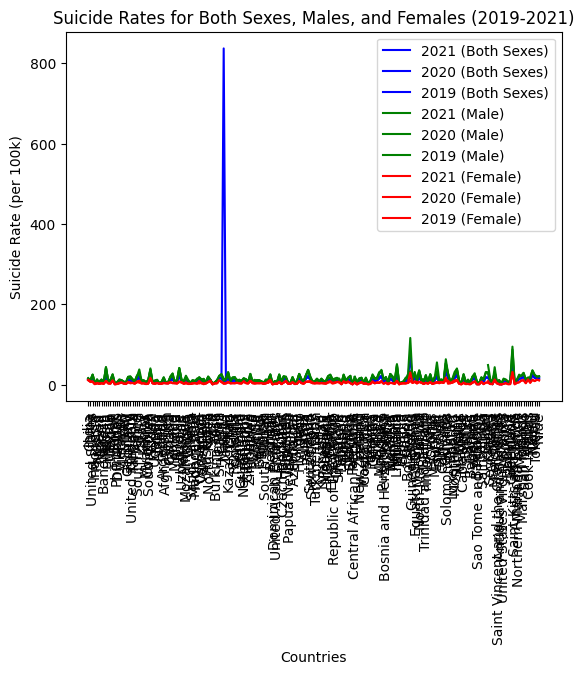

In [346]:
plot_Lineplot(df)

In [324]:
# Here I am using the first four countries into a new dataframe because line graph is so messy withall the data...
new_df=df.head(4)
new_df

,country,SRB_2021,SRM_2021,SRF_2021,SRB_2020,SRM_2020,SRF_2020,SRB_2019,SRM_2019,SRF_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1


In [325]:
# plotting the line graph using the new data frame...

In [343]:
def plot_Lineplot(df):
    plt.figure(dpi=110)

    # Plot for Both Sexes...
    plt.plot(df['country'], df['SRB_2021'], label='2021 (Both Sexes)', color='blue')
    plt.plot(df['country'], df['SRB_2020'], label='2020 (Both Sexes)', color='blue')
    plt.plot(df['country'], df['SRB_2019'], label='2019 (Both Sexes)', color='blue')

    # Plot for Male...
    plt.plot(df['country'], df['SRM_2021'], label='2021 (Male)', color='green')
    plt.plot(df['country'], df['SRM_2020'], label='2020 (Male)', color='green')
    plt.plot(df['country'], df['SRM_2019'], label='2019 (Male)', color='green')

    # Plot for Female...
    plt.plot(df['country'], df['SRF_2021'], label='2021 (Female)', color='red')
    plt.plot(df['country'], df['SRF_2020'], label='2020 (Female)', color='red')
    plt.plot(df['country'], df['SRF_2019'], label='2019 (Female)', color='red')

    plt.title('Suicide Rates for Both Sexes, Males, and Females (2019-2021)')
    plt.xlabel('Countries')
    plt.ylabel('Suicide Rate (per 100k)')
    plt.legend()
    plt.show()
    return

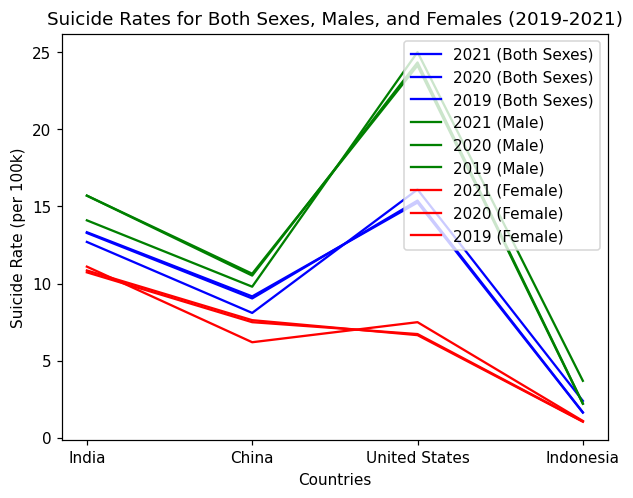

In [344]:
plot_Lineplot(new_df)

In [328]:
# plot the subplotted Histograms...

In [329]:
def plot_subplotted_histograms(df):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15), dpi=110)
    categories = ['Both Sexes', 'Male', 'Female']
    years = ['2021', '2020', '2019']

    for i, category in enumerate(categories):
        for j, year in enumerate(years):
            column_name = f"SR{category[0]}_{year}"
            ax[i, j].hist(df[column_name], bins=10, alpha=0.5 if category == 'Both Sexes' else (0.8 if category == 'Male' else 1), label=f'{year} ({category})')

            ax[i, j].set_title(f'{year} ({category})')
            ax[i, j].set_xlabel('Suicide Rate (per 100k)')
            ax[i, j].set_ylabel('Range')


    plt.legend()
    plt.show()




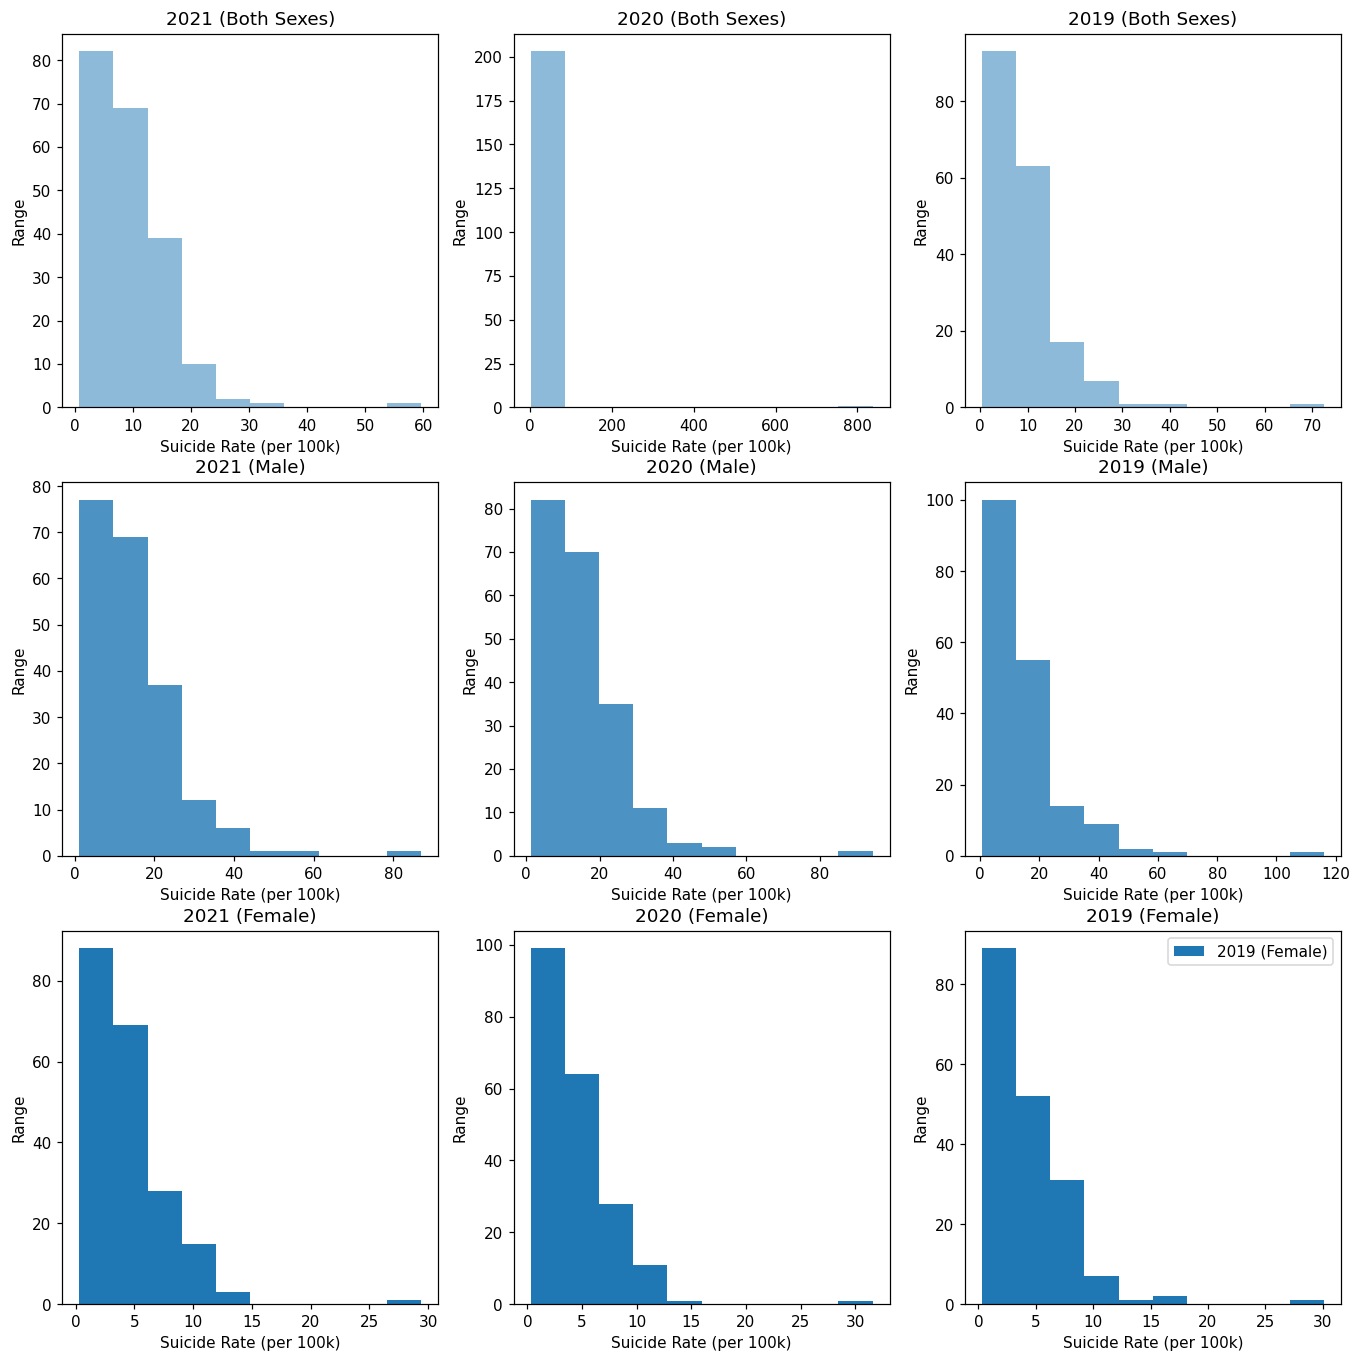

In [330]:
plot_subplotted_histograms(df)

In [331]:
# plot the overplotted Histogram...

In [332]:
def plot_overplotted_histograms(df):
    plt.figure(dpi=110)
    categories = ['Both Sexes', 'Male', 'Female']
    years = ['2019', '2020', '2021']

    for i, category in enumerate(categories):
        for year in years:
            column_name = f"SR{category[0]}_{year}"
            plt.hist(df[column_name], bins=10, alpha=0.5, label=f'{year} ({category})')

    plt.title('Distribution of Suicide Rates for Both Sexes, Males, and Females (2019-2021)')
    plt.xlabel('Suicide Rate (per 100k)')
    plt.ylabel('Range')
    plt.legend()
    plt.show()
    return


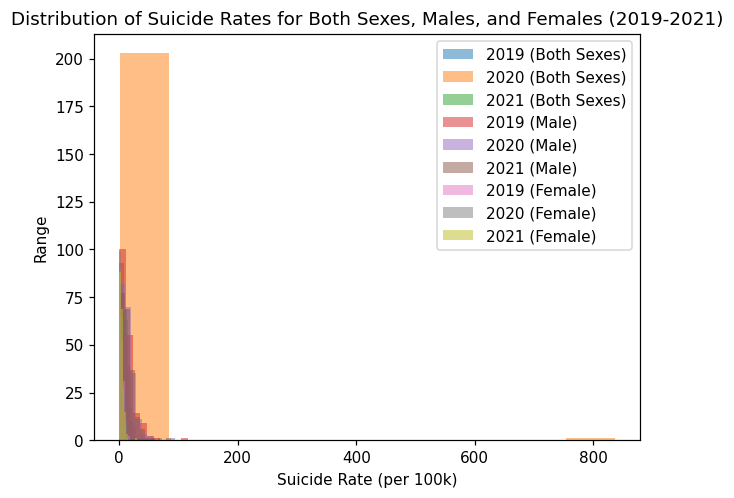

In [333]:
plot_overplotted_histograms(df)

In [334]:
# Plot the Heatmap using Kendall Correlation...

In [341]:
def plot_Heatmap(df, method):
    fig, ax = plt.subplots(dpi=110)
    correlation_data = df[['SRB_2021', 'SRB_2020', 'SRB_2019', 'SRM_2021', 'SRM_2020', 'SRM_2019', 'SRF_2021', 'SRF_2020', 'SRF_2019']]
    mask = np.triu(np.ones_like(correlation_data.corr()))
    sns.heatmap(correlation_data.corr(method=method), annot=True,ax=ax, cmap='RdBu',cbar=True,mask=mask)
    
    plt.title(f'{method.capitalize()} Correlation Heatmap of Suicide Rates (2019-2021)')
    plt.show()
    return

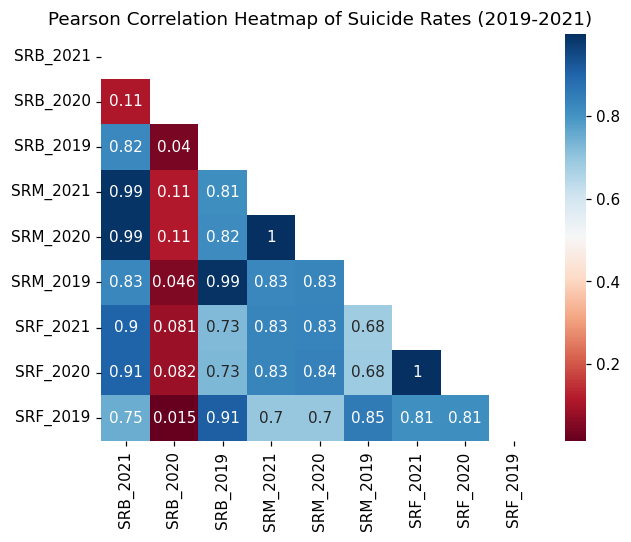

In [342]:
plot_Heatmap(df, 'pearson')